In [47]:
import pandas as pd
import numpy as np

In [48]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day33-handling-mixed-variables/titanic.csv"
df = pd.read_csv(url)
df.head(3)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1


In [49]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passenger travelling with')

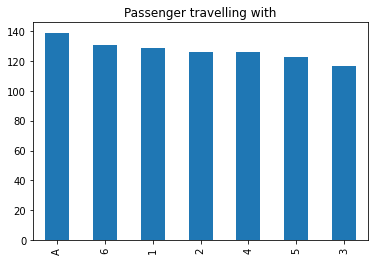

In [50]:
fig = df['number'].value_counts().plot.bar()
fig.set_title("Passenger travelling with")

In [51]:
# Extract numerical part
df['number_numerical'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [52]:
# Extract categorical part

df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [53]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [55]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')        # capture numerical part
df['Cabin_cat'] = df['Cabin'].str[0]                     # captures the first letter

df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,Cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<AxesSubplot:>

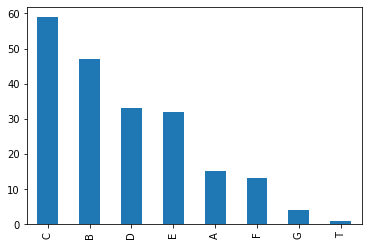

In [56]:
df['Cabin_cat'].value_counts().plot(kind = 'bar')

In [58]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce', downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s:s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,Cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


### Date and Time Variable data

In [59]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/orders.csv"
date = pd.read_csv(url)

In [63]:
url ="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/messages.csv"
time = pd.read_csv(url)

In [61]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [64]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [66]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [67]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Working with Dates

In [68]:
# converting to datetime datatype
date['date'] = pd.to_datetime(date['date'])

### Extract year

In [69]:
date['date_year'] = date['date'].dt.year

In [70]:
date.head()

,date,product_id,city_id,orders,date_year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019


### Extract month

In [72]:
date['date_month'] = date['date'].dt.month
date.head()

,date,product_id,city_id,orders,date_year,date_month
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [73]:
date['date_month_name'] = date['date'].dt.month_name()
date.head(2)

,date,product_id,city_id,orders,date_year,date_month,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August


### EXtract date

In [74]:
date['date_day'] = date['date'].dt.day
date.head(3)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23


In [75]:
date['date_day_name']  = date['date'].dt.day_name()

In [76]:
date.head(4)

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_day_name
0,2019-12-10,5628,25,3,2019,12,December,10,Tuesday
1,2018-08-15,3646,14,157,2018,8,August,15,Wednesday
2,2018-10-23,1859,25,1,2018,10,October,23,Tuesday
3,2019-08-17,7292,25,1,2019,8,August,17,Saturday


In [77]:
# day of week
date['date_dow'] = date['date'].dt.day_of_week
date.head()

,date,product_id,city_id,orders,date_year,date_month,date_month_name,date_day,date_day_name,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,Tuesday,1
1,2018-08-15,3646,14,157,2018,8,August,15,Wednesday,2
2,2018-10-23,1859,25,1,2018,10,October,23,Tuesday,1
3,2019-08-17,7292,25,1,2019,8,August,17,Saturday,5
4,2019-01-06,4344,25,3,2019,1,January,6,Sunday,6


In [78]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_day_name'].isin(['Sunday', 'Saturday']), 1, 0)

date.drop(columns=['product_id', 'city_id', "orders"]).head()

,date,date_year,date_month,date_month_name,date_day,date_day_name,date_dow,date_is_weekend
0,2019-12-10,2019,12,December,10,Tuesday,1,0
1,2018-08-15,2018,8,August,15,Wednesday,2,0
2,2018-10-23,2018,10,October,23,Tuesday,1,0
3,2019-08-17,2019,8,August,17,Saturday,5,1
4,2019-01-06,2019,1,January,6,Sunday,6,1


### Extract week of the day

In [83]:
date['date_week'] = date['date'].dt.week
date.drop(columns=['product_id', 'city_id', 'orders']).head()

C:\Users\uqba2\AppData\Local\Temp\ipykernel_6352\1922620283.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


,date,date_year,date_month,date_month_name,date_day,date_day_name,date_dow,date_is_weekend,date_week
0,2019-12-10,2019,12,December,10,Tuesday,1,0,50
1,2018-08-15,2018,8,August,15,Wednesday,2,0,33
2,2018-10-23,2018,10,October,23,Tuesday,1,0,43
3,2019-08-17,2019,8,August,17,Saturday,5,1,33
4,2019-01-06,2019,1,January,6,Sunday,6,1,1


### Extract Quarter

In [84]:
date['date_quarter'] = date['date'].dt.quarter
date.drop(columns=['product_id', 'city_id', 'orders']).head()

,date,date_year,date_month,date_month_name,date_day,date_day_name,date_dow,date_is_weekend,date_week,date_quarter
0,2019-12-10,2019,12,December,10,Tuesday,1,0,50,4
1,2018-08-15,2018,8,August,15,Wednesday,2,0,33,3
2,2018-10-23,2018,10,October,23,Tuesday,1,0,43,4
3,2019-08-17,2019,8,August,17,Saturday,5,1,33,3
4,2019-01-06,2019,1,January,6,Sunday,6,1,1,1


### Extract semester

In [86]:
date['semester'] = np.where(date['date_quarter'].isin([1, 2]), 1, 2)
date.drop(columns=['product_id', 'city_id', 'orders']).head()

,date,date_year,date_month,date_month_name,date_day,date_day_name,date_dow,date_is_weekend,date_week,date_quarter,semester
0,2019-12-10,2019,12,December,10,Tuesday,1,0,50,4,2
1,2018-08-15,2018,8,August,15,Wednesday,2,0,33,3,2
2,2018-10-23,2018,10,October,23,Tuesday,1,0,43,4,2
3,2019-08-17,2019,8,August,17,Saturday,5,1,33,3,2
4,2019-01-06,2019,1,January,6,Sunday,6,1,1,1,1


### Extract time between two dates

In [87]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2022, 9, 17, 14, 50, 42, 645253)

In [88]:
today - date['date']

0     1012 days 14:50:42.645253
1     1494 days 14:50:42.645253
2     1425 days 14:50:42.645253
3     1127 days 14:50:42.645253
4     1350 days 14:50:42.645253
                 ...           
995   1440 days 14:50:42.645253
996   1381 days 14:50:42.645253
997   1229 days 14:50:42.645253
998   1294 days 14:50:42.645253
999   1068 days 14:50:42.645253
Name: date, Length: 1000, dtype: timedelta64[ns]

In [91]:
(today - date['date']).dt.days

0      1012
1      1494
2      1425
3      1127
4      1350
       ... 
995    1440
996    1381
997    1229
998    1294
999    1068
Name: date, Length: 1000, dtype: int64

In [92]:
# Month paased

np.round((today - date['date'])/ np.timedelta64(1, 'M'),0)

0      33.0
1      49.0
2      47.0
3      37.0
4      44.0
       ... 
995    47.0
996    45.0
997    40.0
998    43.0
999    35.0
Name: date, Length: 1000, dtype: float64

# Time

In [93]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [94]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [95]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [96]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


### Extract Time part

In [97]:
time['time'] = time['date'].dt.time
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


### Time difference

In [99]:
today - time['date']

0     3198 days 14:00:42.645253
1     3062 days 15:10:42.645253
2     3548 days 14:29:42.645253
3     2850 days 14:19:42.645253
4     3247 days 15:39:42.645253
                 ...           
995   3837 days 14:00:42.645253
996   3158 days 15:36:42.645253
997   3623 days 15:13:42.645253
998   3739 days 15:16:42.645253
999   3011 days 15:25:42.645253
Name: date, Length: 1000, dtype: timedelta64[ns]

In [100]:
# in minutes

(today - time['date'])/np.timedelta64(1, 'm')

0      4.605961e+06
1      4.410191e+06
2      5.109990e+06
3      4.104860e+06
4      4.676620e+06
           ...     
995    5.526121e+06
996    4.548457e+06
997    5.218034e+06
998    5.385077e+06
999    4.336766e+06
Name: date, Length: 1000, dtype: float64

In [101]:
# in Second

(today - time['date'])/np.timedelta64(1, 's')

0      2.763576e+08
1      2.646114e+08
2      3.065994e+08
3      2.462916e+08
4      2.805972e+08
           ...     
995    3.315672e+08
996    2.729074e+08
997    3.130820e+08
998    3.231046e+08
999    2.602059e+08
Name: date, Length: 1000, dtype: float64

In [102]:
# in hours

(today - time['date'])/np.timedelta64(1, 'h')

0      76766.011846
1      73503.178513
2      85166.495179
3      68414.328513
4      77943.661846
           ...     
995    92102.011846
996    75807.611846
997    86967.228513
998    89751.278513
999    72279.428513
Name: date, Length: 1000, dtype: float64